In [2]:
#we are using one hidden layer here
windowsize = 15000 #feature 
overlap = 75 ##percentage of overlap between two consecutive windows
codebook = 1500 #maintaining dim(feature)/dim(codebook) ratio 0.1

In [5]:
import matplotlib.pyplot as plt
from __future__ import print_function
import librosa
import numpy as np

# Load the audio as a waveform `y`
# Store the sampling rate as `sr`
#y1, sr = librosa.load('dev_1_ebr_6_nec_5_poly_1.wav', sr = 44100)
#y2, sr = librosa.load('dev_1_ebr_0_nec_5_poly_1.wav', sr = 44100)
#y3, sr = librosa.load('dev_1_ebr_-6_nec_5_poly_1.wav', sr = 44100)
#y4, sr = librosa.load('dev_1_ebr_6_nec_3_poly_0.wav', sr = 44100)
#y5, sr = librosa.load('dev_1_ebr_0_nec_3_poly_0.wav', sr = 44100)
y6, sr = librosa.load('dev_1_ebr_-6_nec_3_poly_0.wav', sr = 44100)
                      
                      
fig = plt.figure(figsize =(20,5))
plt.plot(y6)

ax=plt.subplot(111)
#ax.axvspan(22050,   33516, color='red', alpha=0.2)
#ax.axvspan(264600,  310464 , color='red', alpha=0.2)
#ax.axvspan(529200,  629307 , color='red', alpha=0.2)
#ax.axvspan(682227,  742644, color='red', alpha=0.2)
#ax.axvspan(793800, 813645, color='red', alpha=0.2)
#ax.axvspan(1058400, 1106910, color='red', alpha=0.2)
#ax.axvspan(1111320, 1161153, color='red', alpha=0.2)
#ax.axvspan(1138662, 1156743, color='red', alpha=0.2)
#ax.axvspan( 1323000, 1362690, color='red', alpha=0.2)
#ax.axvspan( 1587600, 1606563, color='red', alpha=0.2)
#ax.axvspan( 1737099, 1805895, color='red', alpha=0.2)

ax.axvspan(22050,  54684, color='red', alpha=0.2)
ax.axvspan(80262, 140238 , color='red', alpha=0.2)
ax.axvspan(252693,  292383, color='red', alpha=0.2)
ax.axvspan(418509, 447174, color='red', alpha=0.2)
ax.axvspan(515529, 557865, color='red', alpha=0.2)
ax.axvspan(725886, 809676 , color='red', alpha=0.2)
ax.axvspan(864360, 878472, color='red', alpha=0.2)
ax.axvspan(1062810, 1127637, color='red', alpha=0.2)
ax.axvspan( 1218483, 1249794, color='red', alpha=0.2)
ax.axvspan( 1366659, 1409877, color='red', alpha=0.2)
ax.axvspan(1547028, 1617147, color='red', alpha=0.2)
ax.axvspan(1781199, 1798398, color='red', alpha=0.2)
ax.axvspan(1805013, 1827063, color='red', alpha=0.2)

plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu/deep-auto-ts-seg/dev_1_ebr_-6_nec_3_poly_0.wav'

In [ ]:
##labels_1 contains the labels from the data set for event intervals
import numpy as np
#labels_1 = [0.50, 0.76, 6.00, 7.04, 12.00, 14.27, 15.47, 
            #16.84, 18.00, 18.45, 24.00, 25.10, 25.20, 
            #26.33, 25.82, 26.23, 30.00, 30.90, 36.00, 36.43, 39.39, 40.95] 
            #13.43, 13.53, 14.81, 17.16, 18.39, 19.86, 20.45] 
#labels_2=
#labels_3=
#labels_4=
#labels_5=
labels_6= [0.50, 1.24, 1.82, 3.18, 5.73, 6.63, 9.49, 
            10.14, 11.69, 12.65, 16.46, 18.36, 19.60, 
            19.92, 24.10, 25.57, 27.63, 28.34, 30.99, 
           31.97, 35.08, 36.67, 40.39, 40.78, 40.93, 41.43] 
            

In [ ]:
##converting time to sample indices
segment_boundaries1=librosa.core.time_to_samples(labels_6, sr=44100)
print (segment_boundaries1)

In [ ]:
#segment_size1= np.diff(segment_boundaries1)
#sorted_segment_size1 = np.sort(segment_size1)
#print (segment_size1)
#segment_size1= [11466, 45864, 100107, 60417, 19845, 48510, 49833, 18081, 39690, 18963, 68796]
segment_size1 = [ 32634, 59976, 39690, 28665, 42336, 83790,  14112, 64827,  31311 , 43218,
                70119, 17199, 22050]
sorted_segment_size1 = np.sort(segment_size1)
print(sorted_segment_size1)

In [3]:
##plotting cdf vs. true segmnet size of our data

cdf_1=np.arange(len(sorted_segment_size1))/float(len(sorted_segment_size1)-1)
fig = plt.figure(figsize=(10,10))
plt.plot(sorted_segment_size1, cdf_1)
plt.xlabel('segment size')
plt.ylabel('CDF')
#plt.xlim(0,130000)
plt.grid(True)
plt.show()

NameError: name 'np' is not defined

In [4]:
y6 = np.array(y6)

NameError: name 'np' is not defined

In [9]:
print (y6)

[-0.00064087 -0.00012207 -0.00061035 ... -0.00088501 -0.0015564
  0.00079346]


In [10]:
input_y = y6[:1828000] ##creating data matrix using the first 12 segments

In [11]:
y_reshape = input_y.reshape(-1, 1)
print (y_reshape)

[[-0.00064087]
 [-0.00012207]
 [-0.00061035]
 ...
 [-0.00033569]
 [-0.00039673]
 [ 0.00076294]]


In [12]:
y_reshape.shape

(1828000, 1)

In [13]:
##converting to float32 for keras input
y_reshape_32 = y_reshape.astype(np.float32)

In [14]:
print(y_reshape_32)

[[-0.00064087]
 [-0.00012207]
 [-0.00061035]
 ...
 [-0.00033569]
 [-0.00039673]
 [ 0.00076294]]


##Rewrite function to see if it can be maade faster

In [15]:
def window_stack(a, stepsize, width):
    return np.hstack(a[i:1+i-width or None:stepsize] for i in range(0, width) )

In [1]:
y_windows = window_stack(y_reshape_32, 4906, 19624) # 2nd and 3rd argument indicates the shift (hence overlap) and windowsize

NameError: name 'window_stack' is not defined

In [17]:
print (y_windows)

[[-0.00064087 -0.00012207 -0.00061035 ...  0.00140381  0.00234985
   0.00335693]
 [-0.00100708  0.00054932 -0.00015259 ...  0.00149536  0.00137329
   0.00045776]
 [-0.00149536  0.00042725 -0.00085449 ... -0.00247192 -0.0039978
  -0.00253296]
 ...
 [-0.00146484 -0.00231934 -0.0007019  ... -0.00210571 -0.00137329
  -0.00326538]
 [ 0.00100708  0.00054932 -0.00015259 ...  0.00250244  0.00326538
   0.00195312]
 [-0.00012207 -0.00106812  0.0012207  ...  0.00137329  0.00152588
   0.00164795]]


In [18]:
y_windows.shape

(484, 15000)

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(y_windows, test_size=0.40, shuffle= False)

In [20]:
train.shape


(290, 15000)

In [21]:
test.shape

(194, 15000)

In [22]:
train = train.reshape((len(train), np.prod(train.shape[1:])))
test = test.reshape((len(test), np.prod(test.shape[1:])))

In [23]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

/Users/tahiyachowdhury/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [24]:
input_img = Input(shape=(15000,))

# "encoded" is the encoded representation of the input
encoded = Dense(2500, activation='sigmoid')(input_img) # layer 1 encoder
#encoded = Dense(2000, activation='sigmoid')(encoded)    #layer 2 encoder 
#encoded = Dense(32, activation='sigmoid')(encoded)    #layer 2 encoder 

## setting ratio between between codebook size and input data size 0.1
# "decoded" is the lossy reconstruction of the input
#decoded = Dense(5000, activation='sigmoid')(encoded)
decoded = Dense(15000, activation='sigmoid')(encoded)     # layer 2 decoder
#decoded = Dense(300, activation='sigmoid')(decoded)  # layer 1 encoder

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [25]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(2500,))

In [26]:
from keras import optimizers
adam = optimizers.Adam(lr=0.001)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [27]:
hist = autoencoder.fit(train, train,
                epochs=5,
                batch_size=50,
                shuffle=False,
                validation_data=(test, test))

Train on 290 samples, validate on 194 samples
Epoch 1/5
290/290 [==============================] - 14s 47ms/step - loss: 0.2150 - val_loss: 0.0070
Epoch 2/5
290/290 [==============================] - 8s 28ms/step - loss: 0.0029 - val_loss: 5.1349e-04
Epoch 3/5
290/290 [==============================] - 9s 29ms/step - loss: 2.7797e-04 - val_loss: 9.4252e-05
Epoch 4/5
290/290 [==============================] - 9s 29ms/step - loss: 4.9166e-05 - val_loss: 1.4423e-05
Epoch 5/5
290/290 [==============================] - 8s 29ms/step - loss: -3.4773e-06 - val_loss: -1.1077e-05


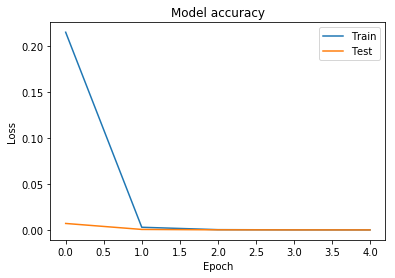

In [28]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [29]:
y_windows.shape

(484, 15000)

In [30]:
encoded_imgs = encoder.predict(y_windows)
dist_dim=(len(encoded_imgs)-1, 1)
dist=np.zeros(dist_dim, dtype = 'float32') 

In [31]:
len(encoded_imgs)

484

In [32]:
dist.shape

(483, 1)

In [33]:
#computing euclidean distance between encoded feature vectors
for l in range(0, len(encoded_imgs)-2):
    dist[l]=np.divide(np.linalg.norm((encoded_imgs[l]-encoded_imgs[l+1]), keepdims=True), np.sqrt((np.linalg.norm(encoded_imgs[l]))*(np.linalg.norm(encoded_imgs[l+1]))))                                                          

In [34]:
dist.shape

(483, 1)

In [35]:
#print(dist)

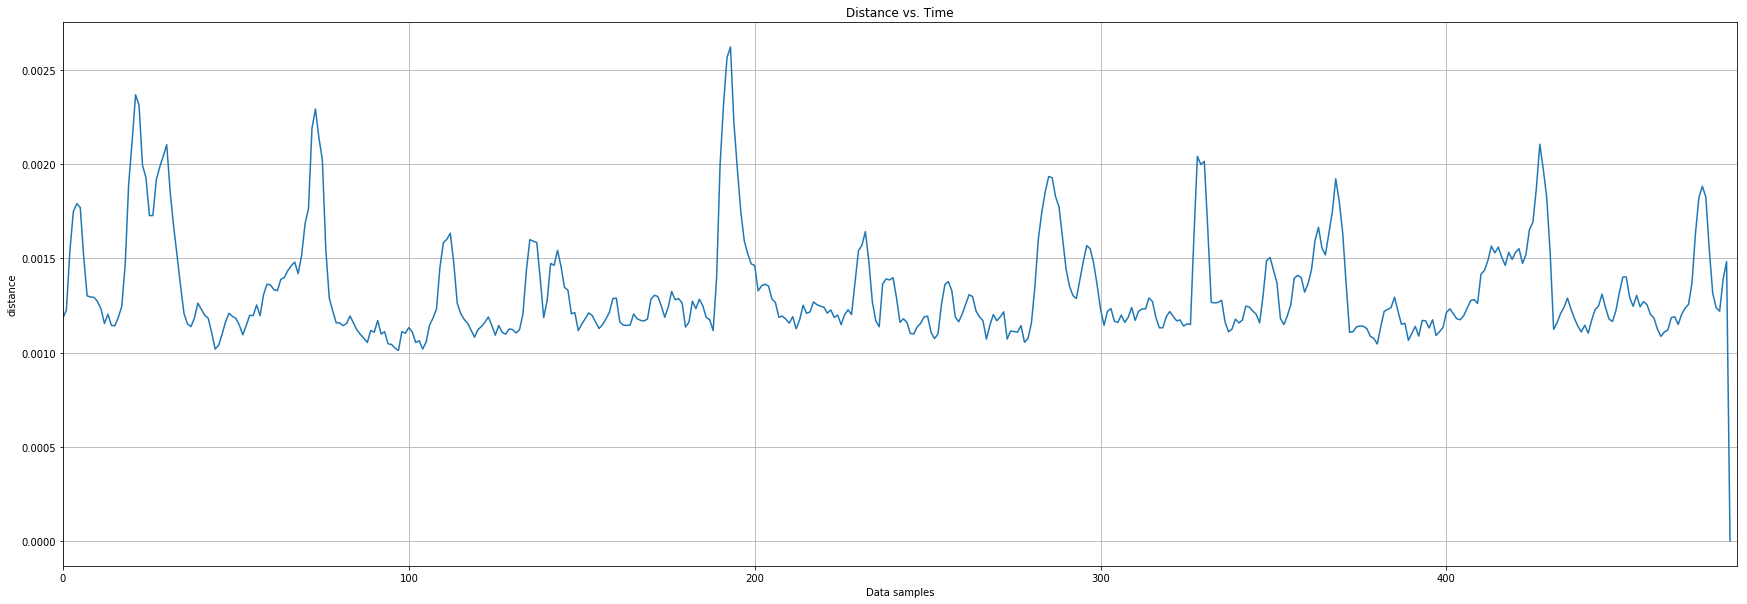

In [36]:
import matplotlib.pyplot as plt
distance = plt.figure(figsize=(30,10))
plt.plot(dist)
plt.ylabel('distance')
plt.xlabel('Data samples')
plt.title('Distance vs. Time')
distance.savefig('Distance vs. Time.png', dpi=distance.dpi)
plt.xlim(0, len(encoded_imgs))
plt.grid(True)
plt.show()

In [37]:
#making dist into a 1-d vector to be used for the detect_peaks and np.convolve functions
dist_new=np.concatenate(dist)

In [38]:
#This function is used for detecting peaks in the distance curve above


def detect_peaks(x, mph=None, mpd=1, threshold=0, edge='rising',
                 kpsh=False, valley=False, show=False, ax=None):

    """Detect peaks in data based on their amplitude and other features.

    Parameters
    ----------
    x : 1D array_like
        data.
    mph : {None, number}, optional (default = None)
        detect peaks that are greater than minimum peak height (if parameter
        `valley` is False) or peaks that are smaller than maximum peak height
         (if parameter `valley` is True).
    mpd : positive integer, optional (default = 1)
        detect peaks that are at least separated by minimum peak distance (in
        number of data).
    threshold : positive number, optional (default = 0)
        detect peaks (valleys) that are greater (smaller) than `threshold`
        in relation to their immediate neighbors.
    edge : {None, 'rising', 'falling', 'both'}, optional (default = 'rising')
        for a flat peak, keep only the rising edge ('rising'), only the
        falling edge ('falling'), both edges ('both'), or don't detect a
        flat peak (None).
    kpsh : bool, optional (default = False)
        keep peaks with same height even if they are closer than `mpd`.
    valley : bool, optional (default = False)
        if True (1), detect valleys (local minima) instead of peaks.
    show : bool, optional (default = False)
        if True (1), plot data in matplotlib figure.
    ax : a matplotlib.axes.Axes instance, optional (default = None).

    Returns
    -------
    ind : 1D array_like
        indeces of the peaks in `x`.

    Notes
    -----
    The detection of valleys instead of peaks is performed internally by simply
    negating the data: `ind_valleys = detect_peaks(-x)`
    
    The function can handle NaN's 

    See this IPython Notebook [1]_.

    References
    ----------
    .. [1] http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/DetectPeaks.ipynb

    Examples
    --------
    >>> from detect_peaks import detect_peaks
    >>> x = np.random.randn(100)
    >>> x[60:81] = np.nan
    >>> # detect all peaks and plot data
    >>> ind = detect_peaks(x, show=True)
    >>> print(ind)

    >>> x = np.sin(2*np.pi*5*np.linspace(0, 1, 200)) + np.random.randn(200)/5
    >>> # set minimum peak height = 0 and minimum peak distance = 20
    >>> detect_peaks(x, mph=0, mpd=20, show=True)

    >>> x = [0, 1, 0, 2, 0, 3, 0, 2, 0, 1, 0]
    >>> # set minimum peak distance = 2
    >>> detect_peaks(x, mpd=2, show=True)

    >>> x = np.sin(2*np.pi*5*np.linspace(0, 1, 200)) + np.random.randn(200)/5
    >>> # detection of valleys instead of peaks
    >>> detect_peaks(x, mph=-1.2, mpd=20, valley=True, show=True)

    >>> x = [0, 1, 1, 0, 1, 1, 0]
    >>> # detect both edges
    >>> detect_peaks(x, edge='both', show=True)

    >>> x = [-2, 1, -2, 2, 1, 1, 3, 0]
    >>> # set threshold = 2
    >>> detect_peaks(x, threshold = 2, show=True)

    Version history
    ---------------
    '1.0.5':
        The sign of `mph` is inverted if parameter `valley` is True
    
    """

    x = np.atleast_1d(x).astype('float64')
    if x.size < 3:
        return np.array([], dtype=int)
    if valley:
        x = -x
        if mph is not None:
            mph = -mph
    # find indices of all peaks
    dx = x[1:] - x[:-1]
    # handle NaN's
    indnan = np.where(np.isnan(x))[0]
    if indnan.size:
        x[indnan] = np.inf
        dx[np.where(np.isnan(dx))[0]] = np.inf
    ine, ire, ife = np.array([[], [], []], dtype=int)
    if not edge:
        ine = np.where((np.hstack((dx, 0)) < 0) & (np.hstack((0, dx)) > 0))[0]
    else:
        if edge.lower() in ['rising', 'both']:
            ire = np.where((np.hstack((dx, 0)) <= 0) & (np.hstack((0, dx)) > 0))[0]
        if edge.lower() in ['falling', 'both']:
            ife = np.where((np.hstack((dx, 0)) < 0) & (np.hstack((0, dx)) >= 0))[0]
    ind = np.unique(np.hstack((ine, ire, ife)))
    # handle NaN's
    if ind.size and indnan.size:
        # NaN's and values close to NaN's cannot be peaks
        ind = ind[np.in1d(ind, np.unique(np.hstack((indnan, indnan-1, indnan+1))), invert=True)]
    # first and last values of x cannot be peaks
    if ind.size and ind[0] == 0:
        ind = ind[1:]
    if ind.size and ind[-1] == x.size-1:
        ind = ind[:-1]
    # remove peaks < minimum peak height
    if ind.size and mph is not None:
        ind = ind[x[ind] >= mph]
    # remove peaks - neighbors < threshold
    if ind.size and threshold > 0:
        dx = np.min(np.vstack([x[ind]-x[ind-1], x[ind]-x[ind+1]]), axis=0)
        ind = np.delete(ind, np.where(dx < threshold)[0])
    # detect small peaks closer than minimum peak distance
    if ind.size and mpd > 1:
        ind = ind[np.argsort(x[ind])][::-1]  # sort ind by peak height
        idel = np.zeros(ind.size, dtype=bool)
        for i in range(ind.size):
            if not idel[i]:
                # keep peaks with the same height if kpsh is True
                idel = idel | (ind >= ind[i] - mpd) & (ind <= ind[i] + mpd) \
                    & (x[ind[i]] > x[ind] if kpsh else True)
                idel[i] = 0  # Keep current peak
        # remove the small peaks and sort back the indices by their occurrence
        ind = np.sort(ind[~idel])

    if show:
        if indnan.size:
            x[indnan] = np.nan
        if valley:
            x = -x
            if mph is not None:
                mph = -mph
        _plot(x, mph, mpd, threshold, edge, valley, ax, ind)

    return ind


def _plot(x, mph, mpd, threshold, edge, valley, ax, ind):
    """Plot results of the detect_peaks function, see its help."""
    try:
        import matplotlib.pyplot as plt
    except ImportError:
        print('matplotlib is not available.')
    else:
        if ax is None:
            _, ax = plt.subplots(1, 1, figsize=(8, 4))

        ax.plot(x, 'b', lw=1)
        if ind.size:
            label = 'valley' if valley else 'peak'
            label = label + 's' if ind.size > 1 else label
            ax.plot(ind, x[ind], '+', mfc=None, mec='r', mew=2, ms=8,
                    label='%d %s' % (ind.size, label))
            ax.legend(loc='best', framealpha=.5, numpoints=1)
        ax.set_xlim(-.02*x.size, x.size*1.02-1)
        ymin, ymax = x[np.isfinite(x)].min(), x[np.isfinite(x)].max()
        yrange = ymax - ymin if ymax > ymin else 1
        ax.set_ylim(ymin - 0.1*yrange, ymax + 0.1*yrange)
        ax.set_xlabel('Data #', fontsize=14)
        ax.set_ylabel('Amplitude', fontsize=14)
        mode = 'Valley detection' if valley else 'Peak detection'
        ax.set_title("%s (mph=%s, mpd=%d, threshold=%s, edge='%s')"
                     % (mode, str(mph), mpd, str(threshold), edge))
        # plt.grid()
        plt.show()

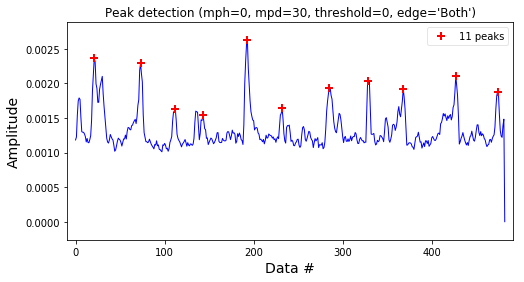

[ 21  73 112 143 193 232 285 328 368 427 474]


In [39]:
#finding the indices of peaks from the distance curve
ind = detect_peaks(dist_new, mph=0, mpd=30, edge='Both', show = True)
print(ind)

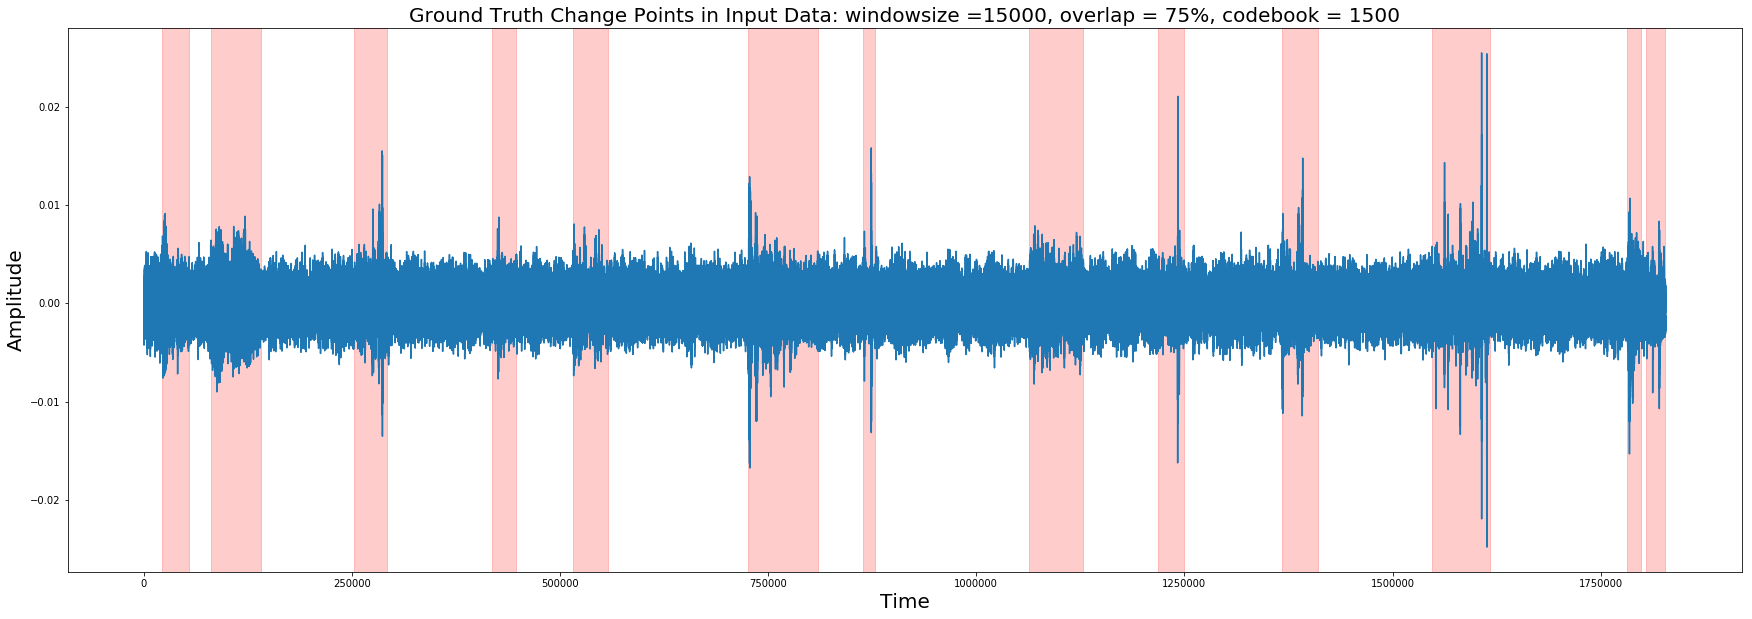

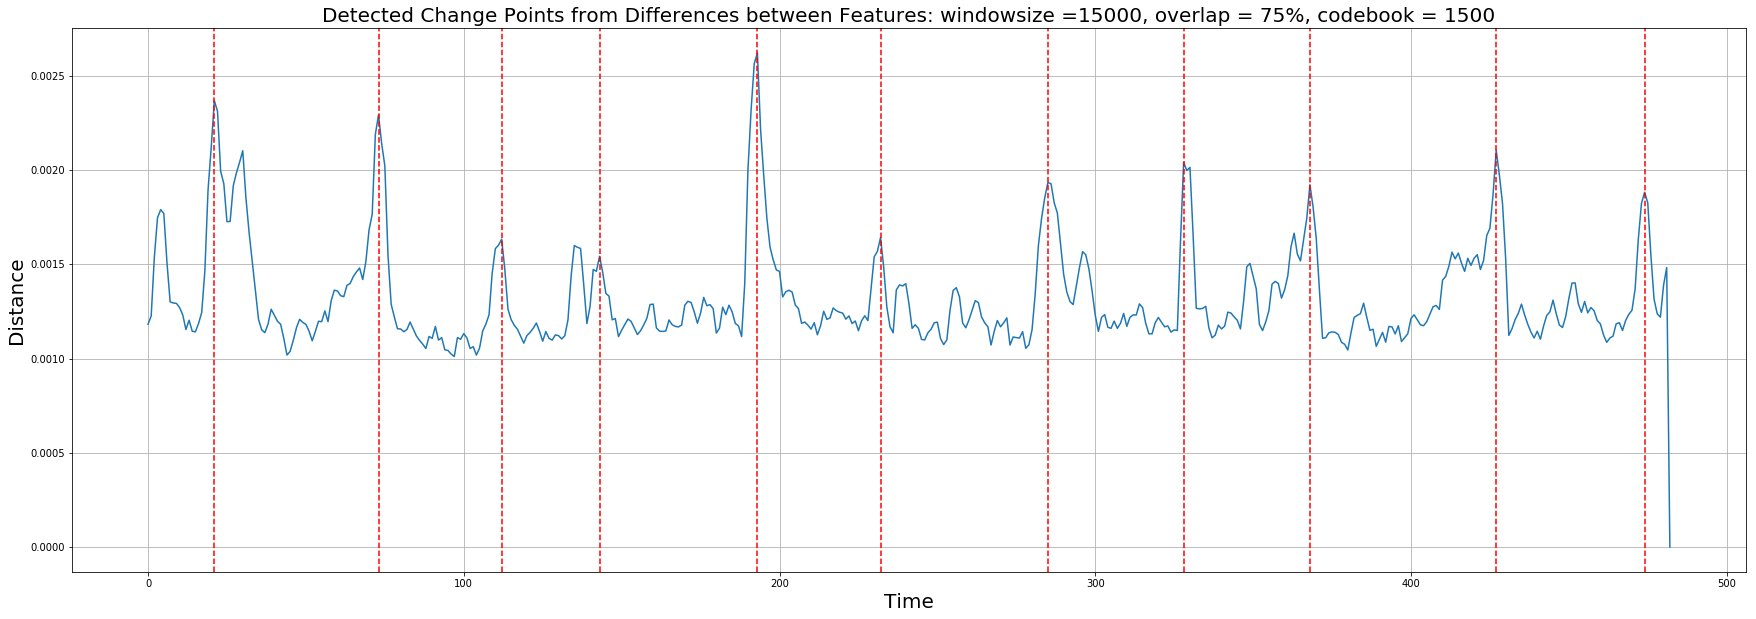

In [40]:
##plotting ground truth change points from original signals

plt.figure(figsize=(30,10))
plt.plot(input_y)
plt.ylabel('Amplitude', fontsize= 20)
plt.xlabel('Time', fontsize= 20)
plt.title('Ground Truth Change Points in Input Data: windowsize =' + str(windowsize) + ',' + ' overlap = ' + str (overlap) + '%' + ','+ ' codebook = ' + str(codebook), fontsize= 20)
ax=plt.subplot(111)
ax.axvspan(22050,  54684, color='red', alpha=0.2)
ax.axvspan(80262, 140238 , color='red', alpha=0.2)
ax.axvspan(252693,  292383, color='red', alpha=0.2)
ax.axvspan(418509, 447174, color='red', alpha=0.2)
ax.axvspan(515529, 557865, color='red', alpha=0.2)
ax.axvspan(725886, 809676 , color='red', alpha=0.2)
ax.axvspan(864360, 878472, color='red', alpha=0.2)
ax.axvspan(1062810, 1127637, color='red', alpha=0.2)
ax.axvspan( 1218483, 1249794, color='red', alpha=0.2)
ax.axvspan( 1366659, 1409877, color='red', alpha=0.2)
ax.axvspan(1547028, 1617147, color='red', alpha=0.2)
ax.axvspan(1781199, 1798398, color='red', alpha=0.2)
ax.axvspan(1805013, 1827063, color='red', alpha=0.2)


#plt.grid(True)

##plotting detected change points from distance between consecutive windows
plt.figure(figsize=(30,10))
plt.plot(dist)
#xcoords = [21,  73, 112, 143, 193, 232, 286, 329, 368, 427, 474]
for xc in ind:
    plt.axvline(x=xc, color = 'red', linestyle = '--')
plt.ylabel('Distance', fontsize= 20)
plt.xlabel('Time', fontsize= 20)
plt.title('Detected Change Points from Differences between Features: windowsize ='  + str(windowsize) + ',' + ' overlap = ' + str (overlap) + '%' + ','+ ' codebook = ' + str(codebook), fontsize= 20)
plt.grid(True)
plt.show()



We have the peaks now, but the curve is not smooth and is not aligning with the ground truth changepoints

In [41]:
##converting the indexes from the encoded windows to time domain
length = len(input_y)
indices = np.asarray(ind, dtype = 'float64')
new_indices = [x / len(y_windows) for x in indices]
new_indices_2 = np.asarray(new_indices, dtype = 'float64')
#print(new_indices_2)

indices_final = np.multiply(new_indices_2, length)
print(indices_final)  ## indices final shows us the location of changepoints

[  79314.04958678  275710.74380165  423008.26446281  540090.90909091
  728933.88429752  876231.40495868 1076404.95867769 1238809.91735537
 1389884.29752066 1612719.00826446 1790231.40495868]


Text(0.5,1,'Ground Truth vs. Predicted Changepoints: windowsize =15000, overlap = 75%, codebook = 1500')

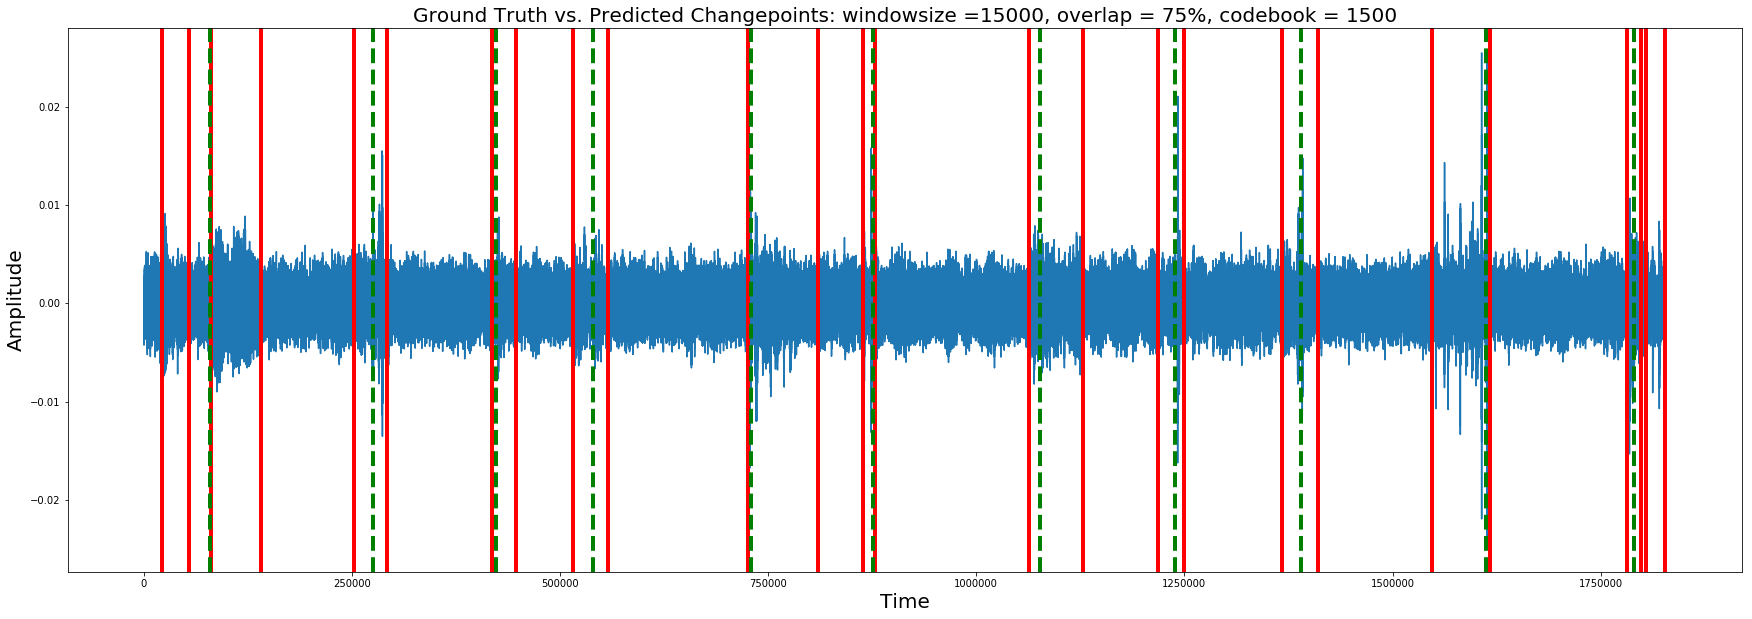

In [42]:
##plotting groundtruth vs. predicted before smoothing

plt.figure(figsize=(30,10))
plt.plot(input_y)
for xs in segment_boundaries1:
    plt.axvline(x=xs, color = 'red', linestyle = 'solid', linewidth=4)

for xc in indices_final:
    plt.axvline(x=xc, color = 'green', linestyle = '--', linewidth=4)
plt.ylabel('Amplitude', fontsize= 20)
plt.xlabel('Time', fontsize= 20)
plt.title('Ground Truth vs. Predicted Changepoints: windowsize =' + str(windowsize) + ',' + ' overlap = ' + str (overlap) + '%' + ','+ ' codebook = ' + str(codebook), fontsize= 20)


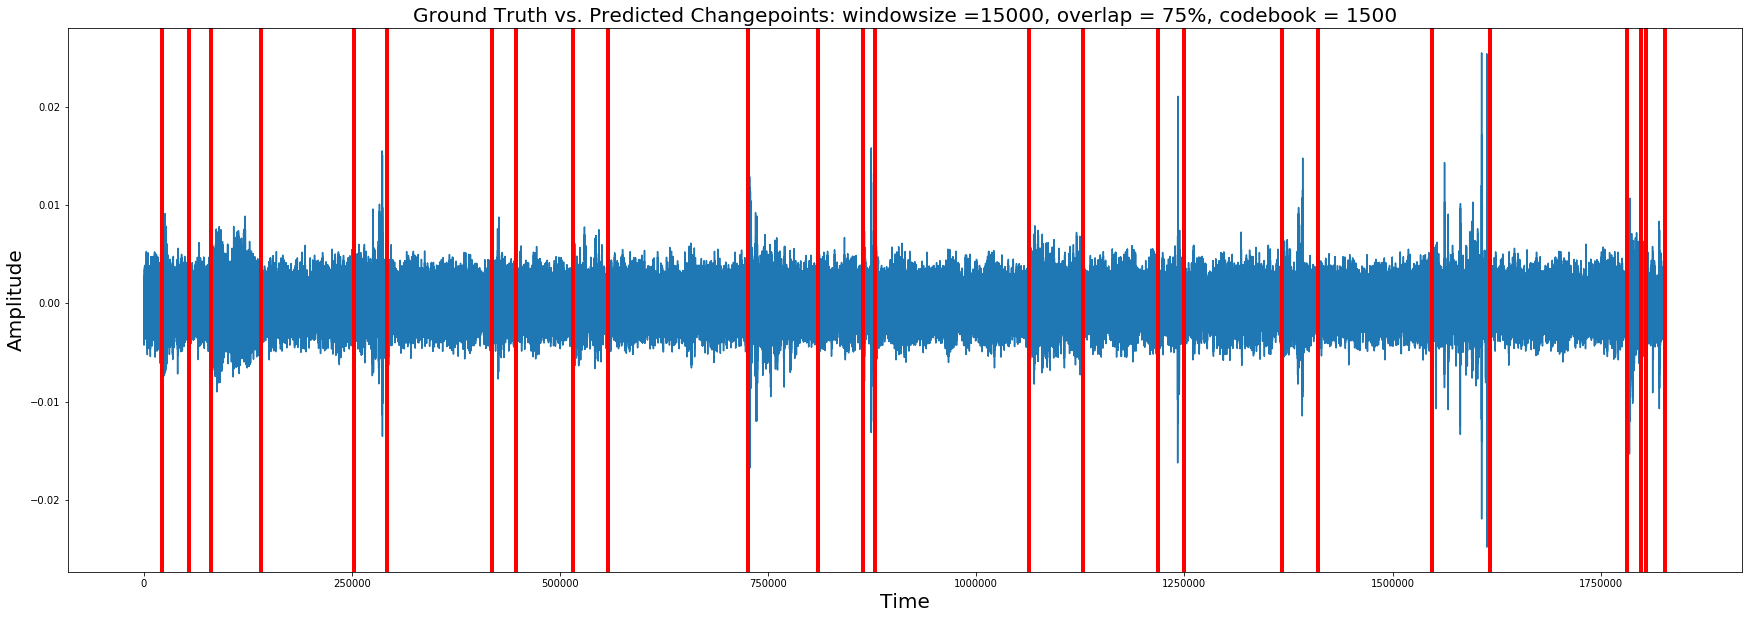

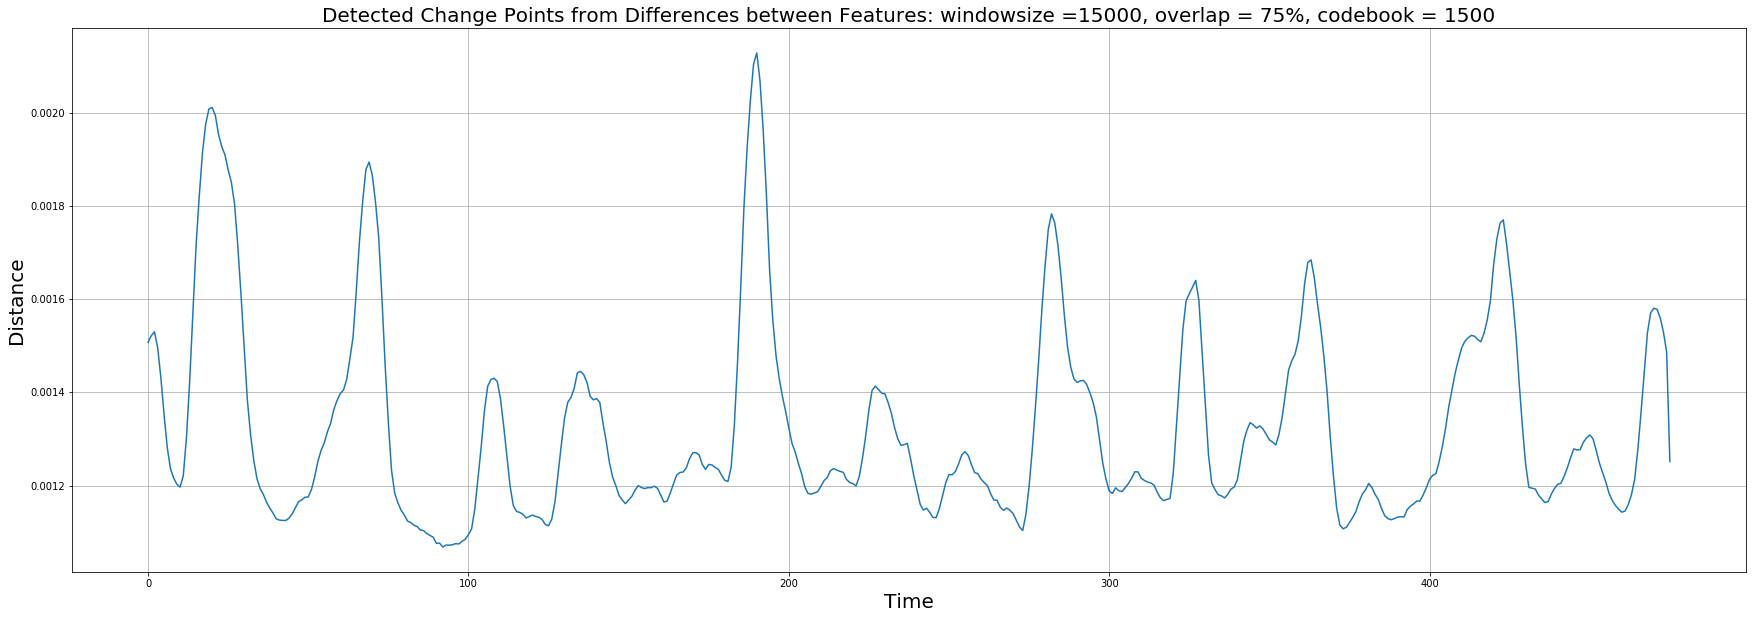

In [43]:
#moving average function will smooth the distance curve
import numpy as np
from numpy import convolve
import matplotlib.pyplot as plt
 
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

smooth = movingaverage(dist_new, 8)

plt.figure(figsize=(30,10))
plt.plot(input_y)
for xs in segment_boundaries1:
    plt.axvline(x=xs, color = 'red', linestyle = 'solid', linewidth=4)

plt.ylabel('Amplitude', fontsize= 20)
plt.xlabel('Time', fontsize= 20)
plt.title('Ground Truth vs. Predicted Changepoints: windowsize =' + str(windowsize) + ',' + ' overlap = ' + str (overlap) + '%' + ','+ ' codebook = ' + str(codebook), fontsize= 20)



plt.figure(figsize=(30,10))
plt.plot(smooth)
##for xs in segment_boundaries1:
    ##plt.axvline(x=xs, color = 'red', linestyle = 'solid', linewidth=4)

##for xc in indices_final:
    ##plt.axvline(x=xc, color = 'green', linestyle = '--', linewidth=4)

#for xc in ind:
    #plt.axvline(x=xc, color = 'red', linestyle = '--')
plt.ylabel('Distance', fontsize= 20)
plt.xlabel('Time', fontsize= 20)
plt.title('Detected Change Points from Differences between Features: windowsize ='  + str(windowsize) + ',' + ' overlap = ' + str (overlap) + '%' + ','+ ' codebook = ' + str(codebook), fontsize= 20)
plt.grid(True)
plt.show()


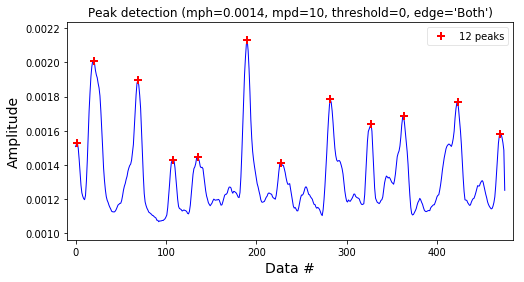

[  2  20  69 108 135 190 227 282 327 363 423 470]


In [44]:
ind_smooth = detect_peaks(smooth, mph=0.0014, mpd=10, edge='Both', show = True)
print(ind_smooth)

In [45]:
##converting the indexes from the encoded windows to time domain
length = len(input_y)
indices_smooth = np.asarray(ind_smooth, dtype = 'float64')
new_indices_smooth = [x / len(y_windows) for x in indices_smooth]
new_indices_4 = np.asarray(new_indices_smooth, dtype = 'float64')
#print(new_indices_2)

indices_smooth_final = np.multiply(new_indices_4, length)
print(indices_smooth_final)  ## indices final shows us the location of changepoints

[   7553.71900826   75537.19008264  260603.30578512  407900.82644628
  509876.03305785  717603.30578512  857347.10743802 1065074.38016529
 1235033.05785124 1371000.         1597611.57024793 1775123.96694215]


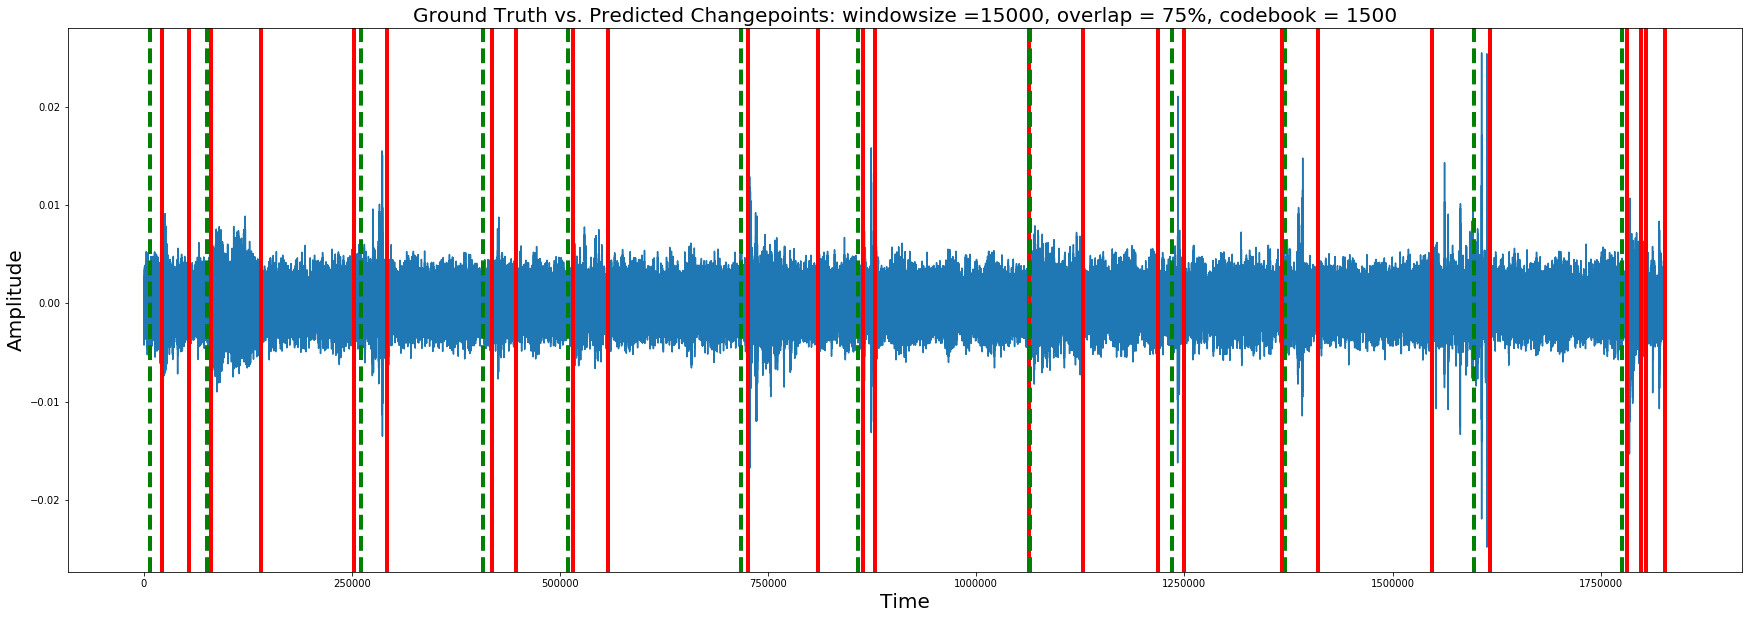

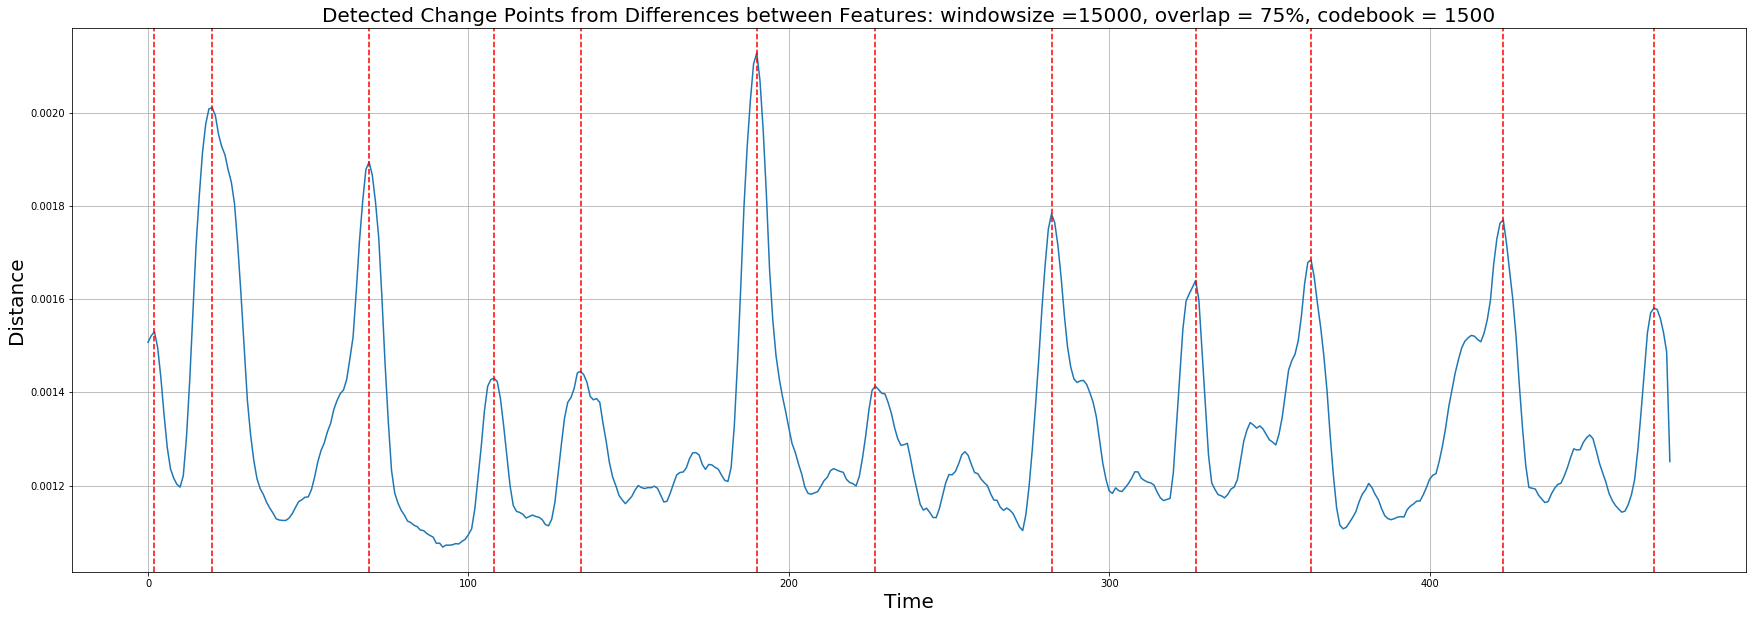

In [46]:
##plotting distance curve after smoothing

plt.figure(figsize=(30,10))
plt.plot(input_y)
for xs in segment_boundaries1:
    plt.axvline(x=xs, color = 'red', linestyle = 'solid', linewidth=4)

for xc in indices_smooth_final:
    plt.axvline(x=xc, color = 'green', linestyle = '--', linewidth=4)
plt.ylabel('Amplitude', fontsize= 20)
plt.xlabel('Time', fontsize= 20)
plt.title('Ground Truth vs. Predicted Changepoints: windowsize =' + str(windowsize) + ',' + ' overlap = ' + str (overlap) + '%' + ','+ ' codebook = ' + str(codebook), fontsize= 20)



plt.figure(figsize=(30,10))
plt.plot(smooth)
##for xs in segment_boundaries1:
    ##plt.axvline(x=xs, color = 'red', linestyle = 'solid', linewidth=4)

#for xc in indices_final:
    ##plt.axvline(x=xc, color = 'green', linestyle = '--', linewidth=4)

for xc in ind_smooth:
    plt.axvline(x=xc, color = 'red', linestyle = '--')
plt.ylabel('Distance', fontsize= 20)
plt.xlabel('Time', fontsize= 20)
plt.title('Detected Change Points from Differences between Features: windowsize ='  + str(windowsize) + ',' + ' overlap = ' + str (overlap) + '%' + ','+ ' codebook = ' + str(codebook), fontsize= 20)
plt.grid(True)
plt.show()



In [49]:
print(segment_boundaries1)


[  22050   54684   80262  140238  252693  292383  418509  447174  515529
  557865  725886  809676  864360  878472 1062810 1127637 1218483 1249794
 1366659 1409877 1547028 1617147 1781199 1798398 1805013 1827063]


In [50]:
print(indices_smooth_final)

[   7553.71900826   75537.19008264  260603.30578512  407900.82644628
  509876.03305785  717603.30578512  857347.10743802 1065074.38016529
 1235033.05785124 1371000.         1597611.57024793 1775123.96694215]


In [51]:
print(indices_final)

[  79314.04958678  275710.74380165  423008.26446281  540090.90909091
  728933.88429752  876231.40495868 1076404.95867769 1238809.91735537
 1389884.29752066 1612719.00826446 1790231.40495868]
